In [632]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import max_error, mean_absolute_error

In [633]:
def calculate_cost(theta, X, y): # theta is dimensions n x 1, X is dimensions m x n, y is dimensions m x 1
    m = X.shape[0]
    cost = (1/(2*m))*(np.square((np.matmul(X,theta.transpose()) - y))).sum() # vectorized implementation of mean squared error as cost function
    return cost

In [634]:
def calculate_grad(theta, X, y): # theta is dimensions n x 1, X is dimensions m x n, y is dimensions m x 1
    m = X.shape[0]
    grad = np.matmul(np.matmul(X,theta.transpose()) - y,X) # vectorized implementation of gradient
    return grad

In [635]:
def linear_reg(X_train, y_train, alpha, iterations): # X is dimensions m x n, y is dimensions m x 1, alpha is learning rate
    theta = np.random.rand(X_train.shape[1]) # randomly initiates weights
    m = X_train.shape[0]
    costs_train = []
    for i in range(iterations):
        costs_train.append(calculate_cost(theta, X_train, y_train))
        theta -= alpha * (1/m)*calculate_grad(theta, X_train ,y_train)
    x_graph = np.arange(0,iterations,1);    
    plt.plot(x_graph,costs_train)
    return theta    

In [636]:
def predict(X,theta):
    return np.matmul(X,theta.transpose())

In [637]:
def plot_cost(X, y, theta):
    pred = predict(X,theta)
    plt.scatter(X[:,1],y)
    plt.plot(X[:,1],pred)

In [638]:
def normalize(X, mean, std):
    return (X-mean) / std

<h2> Applying linear regression model on data from kaggle </h2>

In [639]:
df = pd.read_csv("data/kaggle_height_weight_data.csv")
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


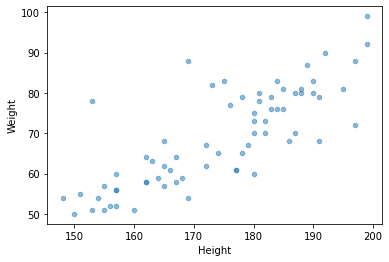

In [640]:
df_height_weight = df.loc[df["Index"] == 2,['Height','Weight']] # get height and weight for normal bmi
df_height_weight.plot.scatter(x="Height", y="Weight", alpha=0.5)

In [641]:
height = df_height_weight['Height'].values
weight = df_height_weight['Weight'].values

In [642]:
X = df_height_weight['Height'].values
normalized_X = normalize(X, X.mean(axis=0), X.std(axis=0))
x_ones = np.ones(X.shape[0])
normalized_X = np.stack((x_ones, normalized_X), 1)
y = df_height_weight['Weight'].values

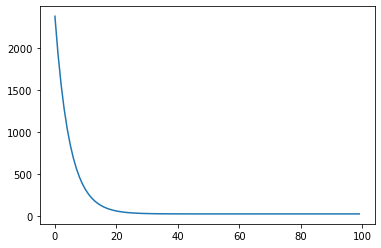

In [643]:
theta = linear_reg(normalized_X, y, 0.1, 100)

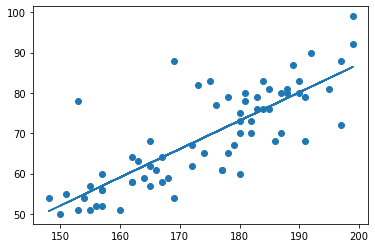

In [644]:
pred = predict(normalized_X,theta)
plt.scatter(X,y)
plt.plot(X,pred)

In [645]:
print(mean_absolute_error(pred,y))

5.2820906659731826


In [646]:
height = (173-X.mean(axis=0)) / X.std(axis=0)
print(predict(np.array([1,height]),theta))

68.20053931988681


In [647]:
df = pd.read_csv("data/kaggle_real_estate_prices.csv",index_col=None)
df = df.sample(frac=1).reset_index(drop=True) # shuffle data
display(df)
display(df.isnull().sum()) # check for nan values

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,221,2013.333,37.2,186.5101,9,24.97703,121.54265,78.3
1,236,2012.750,12.9,250.6310,7,24.96606,121.54297,39.3
2,360,2013.500,5.6,2408.9930,0,24.95505,121.55964,24.7
3,195,2013.500,15.2,3771.8950,0,24.93363,121.51158,29.3
4,41,2013.000,13.6,4082.0150,0,24.94155,121.50381,15.9
...,...,...,...,...,...,...,...,...
409,167,2013.417,0.0,292.9978,6,24.97744,121.54458,73.6
410,125,2012.917,9.9,279.1726,7,24.97528,121.54541,57.4
411,172,2013.083,3.6,383.8624,5,24.98085,121.54391,58.8
412,198,2013.250,34.4,126.7286,8,24.96881,121.54089,48.2


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [648]:
X = df.loc[:,df.columns != "Y house price of unit area"]
y= df.loc[:,"Y house price of unit area"]

In [649]:
X_train = normalize(X, X.mean(axis=0),X.std(axis=0))
X_train.insert(0, 'One', 1)
display(X_train)

,One,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,0.112824,0.652661,1.710552,-0.711012,1.665488,0.644625,0.605252
1,1,0.238183,-1.414955,-0.422433,-0.660208,0.986500,-0.239325,0.626103
2,1,1.274489,1.244928,-1.063206,1.049915,-1.389957,-1.126499,1.712296
3,1,-0.104466,1.244928,-0.220545,2.129775,-1.389957,-2.852499,-1.419224
4,1,-1.391492,-0.528327,-0.360989,2.375490,-1.389957,-2.214314,-1.925506
...,...,...,...,...,...,...,...,...
409,1,-0.338471,0.950568,-1.554758,-0.626640,0.647006,0.677663,0.731008
410,1,-0.689478,-0.822688,-0.685764,-0.637594,0.986500,0.503612,0.785090
411,1,-0.296684,-0.233967,-1.238761,-0.554645,0.307513,0.952437,0.687352
412,1,-0.079394,0.358300,1.464776,-0.758379,1.325994,-0.017733,0.490573


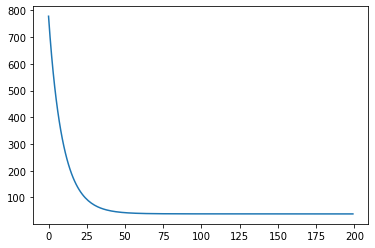

In [650]:
theta = linear_reg(X_train.values, y.values, 0.05, 200)

In [651]:
pred = predict(X_train.values, theta)
print(mean_absolute_error(pred,y))

6.114142612593052


In [652]:
model = LinearRegression()
model.fit(X_train, y)
y_pred = model.predict(X_train)
print(mean_absolute_error(y_pred,y))

6.0962239376079435
